In [160]:
import pandas as pd
import yfinance as yf
import numpy as np
from isyatirimhisse import fetch_data, fetch_financials, visualize_data

In [161]:
thyao=yf.download("THYAO.IS",start="2011-12-30",end="2023-10-01")


[*********************100%%**********************]  1 of 1 completed


In [162]:
symbol='THYAO'
start_year='2011'
end_year='2023'
save_to_excel=True
language='tr'

veri = fetch_financials(
    symbol=symbol,
    start_year=start_year,
    end_year=end_year,
    save_to_excel=save_to_excel,
    language=language
)
bilanco=pd.read_excel("finansallar_THYAO_20231001.xlsx")
bilanco=bilanco.T


In [163]:
bilanco.columns=bilanco.iloc[1]
bilanco=bilanco.drop([bilanco.index[0],bilanco.index[1]])
bilanco["Çeyreklik Kar"]=0


In [164]:
for i in range(0,50):
   if i%4==0:
      bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]
   else:
      bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]-bilanco["DÖNEM KARI (ZARARI)"].iloc[i-1]
bilanco["Çeyreklik Kar"]

C:\Users\Bora\AppData\Local\Temp\ipykernel_12948\3152838637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]
C:\Users\Bora\AppData\Local\Temp\ipykernel_12948\3152838637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]-bilanco["DÖNEM KARI (ZARARI)"].iloc[i-1]
C:\Users\Bora\AppData\Local\Temp\ipykernel_12948\3152838637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

2011/3      -219812279
2011/6      -170624948
2011/9       505519024
2011/12      -96565165
2012/3       -29382971
2012/6       200947254
2012/9       704623933
2012/12      279528841
2013/3       -22339523
2013/6       143542132
2013/9       705082409
2013/12     -143577591
2014/3      -226340183
2014/6       398151927
2014/9      1373457128
2014/12      273731128
2015/3       372000000
2015/6       661000000
2015/9      1342000000
2015/12      618000000
2016/3     -1238000000
2016/6      -656000000
2016/9       548000000
2016/12     1299000000
2017/3     -1421000000
2017/6      -194000000
2017/9      2438000000
2017/12     -184000000
2018/3      -314000000
2018/6       441000000
2018/9      3956000000
2018/12      -38000000
2019/3     -1253000000
2019/6       133000000
2019/9      3707000000
2019/12     1949000000
2020/3     -2023000000
2020/6     -2234000000
2020/9      -946000000
2020/12     -385000000
2021/3       438000000
2021/6      -497000000
2021/9      6291000000
2021/12    

In [165]:
bilanco["Yıllıklandırılmış Kar"]=bilanco["Çeyreklik Kar"].rolling(4).sum()
bilanco["Yıllıklandırılmış Kar"]



2011/3              NaN
2011/6              NaN
2011/9              NaN
2011/12    1.851663e+07
2012/3     2.089459e+08
2012/6     5.805181e+08
2012/9     7.796231e+08
2012/12    1.155717e+09
2013/3     1.162761e+09
2013/6     1.105355e+09
2013/9     1.105814e+09
2013/12    6.827074e+08
2014/3     4.787068e+08
2014/6     7.333166e+08
2014/9     1.401691e+09
2014/12    1.819000e+09
2015/3     2.417340e+09
2015/6     2.680188e+09
2015/9     2.648731e+09
2015/12    2.993000e+09
2016/3     1.383000e+09
2016/6     6.600000e+07
2016/9    -7.280000e+08
2016/12   -4.700000e+07
2017/3    -2.300000e+08
2017/6     2.320000e+08
2017/9     2.122000e+09
2017/12    6.390000e+08
2018/3     1.746000e+09
2018/6     2.381000e+09
2018/9     3.899000e+09
2018/12    4.045000e+09
2019/3     3.106000e+09
2019/6     2.798000e+09
2019/9     2.549000e+09
2019/12    4.536000e+09
2020/3     3.766000e+09
2020/6     1.399000e+09
2020/9    -3.254000e+09
2020/12   -5.588000e+09
2021/3    -3.127000e+09
2021/6    -1.390

In [166]:
bilanco=bilanco.tail(47)

<Axes: title={'center': 'Yıllık Kar'}>

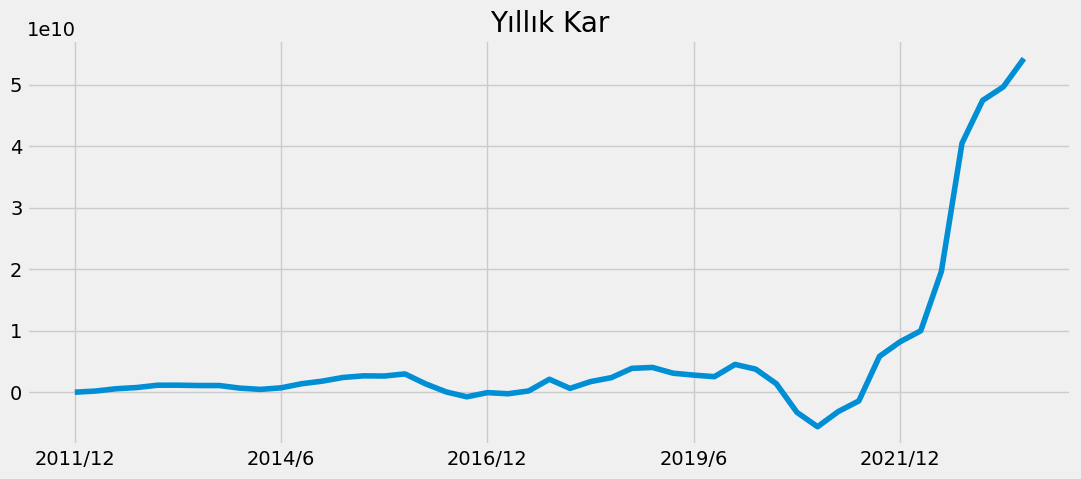

In [167]:
bilanco["Yıllıklandırılmış Kar"].plot(kind="line",figsize=(12,5),title="Yıllık Kar")




In [168]:
fiyat=pd.DataFrame()
dönem=pd.date_range(start="2011-12-30",end="2023-10-01",freq="Q")
fiyat["Fiyat"]=thyao["Close"].resample("Q").last()



# Güncellenmiş DataFrame'i gösterelim
fiyat

,Fiyat
Date,
2011-12-31,1.852173
2012-03-31,2.260869
2012-06-30,2.765217
2012-09-30,3.269565
2012-12-31,5.443478
2013-03-31,6.504347
2013-06-30,7.500000
2013-09-30,7.700000
2013-12-31,6.440000


In [169]:
dönem=pd.date_range(start="2011-12-31",end="2023-07-01",freq="Q")
bilanco=bilanco.set_index(dönem)
bilanco

THYAO,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Finans Sektörü Faaliyetlerinden Alacaklar,Diğer Alacaklar,Stoklar,Canlı Varlıklar,Diğer Dönen Varlıklar,(Ara Toplam),...,Müşteri Sözleşmelerinden Doğan Varlıklar,Müşteri Sözleşmelerinden Doğan Varlıklar,Kullanım Hakkı Varlıkları,Müşteri Söz. Doğan Yük.,Ertelenmiş Gelirler (Müşteri Söz. Doğan Yük. Dış.Kal.),Müşteri Söz.Doğan Yük.,Ertelenmiş Gelirler (Müşteri Söz.Doğan Yük. Dış.Kal.),Finansman Gideri Öncesi Faaliyet Karı/Zararı,Çeyreklik Kar,Yıllıklandırılmış Kar
2011-12-31,4042735398.0,1549524710.0,213899678.0,764775891.0,0.0,792699876.0,251785807.0,0.0,190577236.0,3763263198.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96565165,1.851663e+07
2012-03-31,4625547466.0,948785055.0,896932914.0,1117152500.0,0.0,863285245.0,292742656.0,0.0,201388456.0,4320286826.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29382971,2.089459e+08
2012-06-30,5170828801.0,1691927955.0,1003915924.0,1001179227.0,0.0,764711631.0,229640636.0,0.0,159590978.0,4850966351.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200947254,5.805181e+08
2012-09-30,5759661457.0,2149780461.0,758209519.0,1156690545.0,0.0,1037374779.0,230762315.0,0.0,85058546.0,5417876165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704623933,7.796231e+08
2012-12-31,3861499409.0,1355542536.0,476958794.0,773610473.0,0.0,755060829.0,259199763.0,0.0,241127014.0,3861499409.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279528841,1.155717e+09
2013-03-31,4462256622.0,1661125350.0,317677402.0,1186520721.0,0.0,806002938.0,293104023.0,0.0,197826188.0,4462256622.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22339523,1.162761e+09
2013-06-30,4702438620.0,1361725077.0,510039540.0,1283219837.0,0.0,921866777.0,246603171.0,0.0,378984218.0,4702438620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143542132,1.105355e+09
2013-09-30,4960538464.0,1726809294.0,0.0,1310885066.0,0.0,1268466715.0,275344894.0,0.0,379032495.0,4960538464.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,705082409,1.105814e+09
2013-12-31,4535535069.0,1338983835.0,42774034.0,1148090163.0,0.0,1380785753.0,342324371.0,0.0,282576913.0,4535535069.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-143577591,6.827074e+08
2014-03-31,5302436831.0,1545693089.0,0.0,1480027823.0,0.0,1521706203.0,366567842.0,0.0,388441874.0,5302436831.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-226340183,4.787068e+08


In [170]:

bilanco=bilanco.loc[:, (bilanco != 0).all(axis=0)]
bilanco

THYAO,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Ticari Alacaklar,Diğer Alacaklar,Stoklar,Diğer Dönen Varlıklar,(Ara Toplam),Duran Varlıklar,Diğer Alacaklar,Finansal Yatırımlar,...,Serbest Nakit Akım,Diğer Finansman Faaliyetlerinden Nakit,Finansman Faaliyetlerden Kaynaklanan Nakit,Yab. Para Çev. Fark. Etk. Önc.Nak.Ve Nak. Benz. Net Artış/Azalış,Nakit ve Benzerlerindeki Değişim,Dönem Başı Nakit Değerler,Dönem Sonu Nakit,Finansman Gideri Öncesi Faaliyet Karı/Zararı,Çeyreklik Kar,Yıllıklandırılmış Kar
2011-12-31,4042735398.0,1549524710.0,764775891.0,792699876.0,251785807.0,190577236.0,3763263198.0,12362211730.0,614598106.0,1767872.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96565165,1.851663e+07
2012-03-31,4625547466.0,948785055.0,1117152500.0,863285245.0,292742656.0,201388456.0,4320286826.0,11590427054.0,470325591.0,1771756.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29382971,2.089459e+08
2012-06-30,5170828801.0,1691927955.0,1001179227.0,764711631.0,229640636.0,159590978.0,4850966351.0,12762363098.0,456744717.0,1780524.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200947254,5.805181e+08
2012-09-30,5759661457.0,2149780461.0,1156690545.0,1037374779.0,230762315.0,85058546.0,5417876165.0,12770019526.0,369072667.0,2050963.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704623933,7.796231e+08
2012-12-31,3861499409.0,1355542536.0,773610473.0,755060829.0,259199763.0,241127014.0,3861499409.0,14896432306.0,1584919109.0,2049244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279528841,1.155717e+09
2013-03-31,4462256622.0,1661125350.0,1186520721.0,806002938.0,293104023.0,197826188.0,4462256622.0,15569715276.0,1583519999.0,2079248.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22339523,1.162761e+09
2013-06-30,4702438620.0,1361725077.0,1283219837.0,921866777.0,246603171.0,378984218.0,4702438620.0,17794633106.0,2103516645.0,2211965.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143542132,1.105355e+09
2013-09-30,4960538464.0,1726809294.0,1310885066.0,1268466715.0,275344894.0,379032495.0,4960538464.0,19387939269.0,2408761233.0,2337686.0,...,1279037295.0,-907770537.0,-907770537.0,371266758.0,371266758.0,1355542536.0,1726809294.0,NaN,705082409,1.105814e+09
2013-12-31,4535535069.0,1338983835.0,1148090163.0,1380785753.0,342324371.0,282576913.0,4535535069.0,20866542749.0,2680608826.0,2452721.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-143577591,6.827074e+08
2014-03-31,5302436831.0,1545693089.0,1480027823.0,1521706203.0,366567842.0,388441874.0,5302436831.0,21873073669.0,2558824238.0,2516501.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-226340183,4.787068e+08


In [171]:
from evds import evdsAPI
from datetime import date
evds=evdsAPI('dsIC3fiGlu')
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
usd=usd.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del usd["Tarih"]
usd=usd.resample("Q").last()
usd.columns=["USDTRY"]
usd

,USDTRY
2011-12-31,1.867823
2012-03-31,1.787882
2012-06-30,1.824833
2012-09-30,1.804275
2012-12-31,1.787676
2013-03-31,1.810457
2013-06-30,1.897915
2013-09-30,2.020786
2013-12-31,2.061532
2014-03-31,2.221786


In [172]:
bist100=evds.get_data(["TP.MK.F.BILESIK"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del bist100["Tarih"]
bist100=bist100.resample("Q").last()
bist100.columns=["BIST100"]
bist100

,BIST100
2011-12-31,521.31
2012-03-31,623.23
2012-06-30,615.25
2012-09-30,667.25
2012-12-31,784.77
2013-03-31,857.35
2013-06-30,769.11
2013-09-30,743.60
2013-12-31,678.02
2014-03-31,694.98


In [173]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-10-2011",enddate="01-06-2023",frequency=5)
enf=enf.set_index(pd.date_range(start="2011-10-31",end="2023-07-01",freq="M"))
del enf["Tarih"]
enf=enf.resample("Q").last()
enf.columns=["TÜFE"]
enf

,TÜFE
2011-12-31,200.85
2012-03-31,203.96
2012-06-30,204.76
2012-09-30,207.55
2012-12-31,213.23
2013-03-31,218.83
2013-06-30,221.75
2013-09-30,223.91
2013-12-31,229.01
2014-03-31,237.18


In [174]:

bilanco=bilanco.dropna(axis=1,how="any")
bilanco["TÜFE"]=enf["TÜFE"]
bilanco["BIST100"]=bist100["BIST100"]
bilanco["USDTRY"]=usd["USDTRY"]
bilanco["Fiyat"]=fiyat["Fiyat"].head(47)




C:\Users\Bora\AppData\Local\Temp\ipykernel_12948\1760472257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["TÜFE"]=enf["TÜFE"]
C:\Users\Bora\AppData\Local\Temp\ipykernel_12948\1760472257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilanco["BIST100"]=bist100["BIST100"]
C:\Users\Bora\AppData\Local\Temp\ipykernel_12948\1760472257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [175]:
X=bilanco.iloc[:,:62]
y=bilanco.iloc[:,62]

In [176]:
for i in X.columns:
    X[i]=X[i].astype(float)


In [177]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=9)  
principal_components = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.79200621, 0.09862063, 0.02784999, 0.02412913, 0.01640219,
       0.01131746, 0.00755564, 0.0062589 , 0.00364253])

In [178]:
X=principal_components
y=bilanco["Fiyat"]

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [180]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm



# Modeli eğitin



results = model.fit(X_train, y_train)

# Modelin özetini görüntüleyin
results.score(X_train,y_train)

0.9949775935236436

In [181]:
tahmin1=pd.DataFrame(results.predict(X_test),columns=["Tahmin"],index=y_test.index)
tahmin1["Gerçek"]=y_test
tahmin1=tahmin1.sort_index()
tahmin1

,Tahmin,Gerçek
2012-09-30,5.097392,3.269565
2012-12-31,6.097375,5.443478
2013-06-30,1.649593,7.500000
2013-12-31,2.352126,6.440000
2014-12-31,8.199252,9.630000
2016-09-30,2.659544,5.140000
2017-12-31,9.454857,15.690000
2018-03-31,11.659235,19.200001
2018-06-30,17.458253,13.490000
2018-09-30,25.211924,19.139999


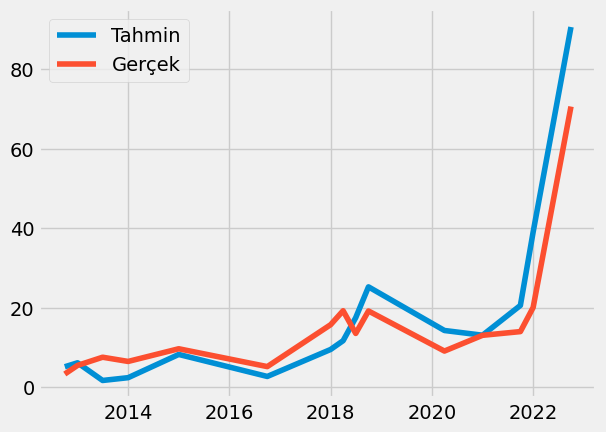

In [182]:
import matplotlib.pyplot as plt
plt.plot(tahmin1["Tahmin"],label="Tahmin")
plt.plot(tahmin1["Gerçek"],label="Gerçek")
plt.legend()

In [183]:
X=bilanco.iloc[:,:62]
y=bilanco.iloc[:,62]

In [184]:
for i in X.columns:
    X[i]=X[i].astype(float)

In [185]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np


# Tahminleri saklamak için bir liste
predictions = []

# Her bir sütun için döngü
for i in range(0,62):  
    # SARIMAX modelini oluşturma
    sarimax_model = SARIMAX(X.iloc[:, i], 
                            order=(0, 1, 1), 
                            seasonal_order=(0, 1, 1, 4))  # Çeyreklik veri için mevsimsel periyot 4

    # Modeli eğitme
    sarimax_fit = sarimax_model.fit(disp=False)

    # Modelin özeti (isteğe bağlı)
    print(sarimax_fit.summary())

    # Gelecekteki 6 değeri tahmin etme
    future_predictions = sarimax_fit.get_forecast(steps=6).predicted_mean

    # Tahminleri listeye ekleme
    predictions.append(future_predictions)

# Tahminleri bir DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions).T  # Transpoze alarak sütunlarla satırları ters çeviriyoruz
predictions_df.columns = X.columns  # Sütun adlarını X DataFrame'inden alıyoruz


extended_X = pd.concat([X, predictions_df], ignore_index=True)



                                     SARIMAX Results                                     
Dep. Variable:                   Dönen Varlıklar   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1020.534
Date:                           Sun, 01 Oct 2023   AIC                           2047.068
Time:                                   20:34:30   BIC                           2052.281
Sample:                               12-31-2011   HQIC                          2048.979
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6367      0.132      4.816      0.000       0.378       0.896
ma.S.L4       -0.0220      0.113     -0.195

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                  Finansal Borçlar   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1031.525
Date:                           Sun, 01 Oct 2023   AIC                           2069.051
Time:                                   20:34:31   BIC                           2074.264
Sample:                               12-31-2011   HQIC                          2070.961
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3265      0.288     -1.136      0.256      -0.890       0.237
ma.S.L4       -0.2844      0.228     -1.248

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as st

                                     SARIMAX Results                                     
Dep. Variable:                   Satış Gelirleri   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1070.664
Date:                           Sun, 01 Oct 2023   AIC                           2147.327
Time:                                   20:34:32   BIC                           2152.540
Sample:                               12-31-2011   HQIC                          2149.238
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2139      0.180     -1.192      0.233      -0.566       0.138
ma.S.L4        0.8683      0.187      4.653

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                     
Dep. Variable:       Genel Yönetim Giderleri (-)   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -885.651
Date:                           Sun, 01 Oct 2023   AIC                           1777.302
Time:                                   20:34:32   BIC                           1782.515
Sample:                               12-31-2011   HQIC                          1779.213
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4741      0.104     -4.561      0.000      -0.678      -0.270
ma.S.L4        0.7472      0.162      4.614

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                                         SARIMAX Results                                                         
Dep. Variable:     Özkaynak Yöntemiyle Değerlenen Yatırımların Kar/Zararlarındaki Paylar   No. Observations:                   47
Model:                                                     SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -893.175
Date:                                                                   Sun, 01 Oct 2023   AIC                           1792.351
Time:                                                                           20:34:32   BIC                           1797.564
Sample:                                                                       12-31-2011   HQIC                          1794.262
                                                                            - 06-30-2023                                         
Covariance Type:                                                                     opg  

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as st

                                     SARIMAX Results                                     
Dep. Variable:               DÖNEM KARI (ZARARI)   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1007.718
Date:                           Sun, 01 Oct 2023   AIC                           2021.436
Time:                                   20:34:32   BIC                           2026.649
Sample:                               12-31-2011   HQIC                          2023.347
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4011      0.126     -3.173      0.002      -0.649      -0.153
ma.S.L4        0.8253      0.114      7.268

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                 Yurtdışı Satışlar   No. Observations:                   47
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1067.131
Date:                           Sun, 01 Oct 2023   AIC                           2140.262
Time:                                   20:34:32   BIC                           2145.475
Sample:                               12-31-2011   HQIC                          2142.173
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1802      0.189     -0.952      0.341      -0.551       0.191
ma.S.L4        0.8667      0.189      4.584

In [186]:
extended_X=extended_X.set_index(pd.date_range(start="2011-12-31",end="2025-01-01",freq="Q"))
extended_X["Yıllıklandırılmış Kar"]=extended_X["Çeyreklik Kar"].rolling(4).sum()
extended_X["HBK"]=extended_X["Yıllıklandırılmış Kar"]/extended_X["Ödenmiş Sermaye"]
extended_X=extended_X.dropna()
extended_X

THYAO,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Ticari Alacaklar,Diğer Alacaklar,Stoklar,Diğer Dönen Varlıklar,(Ara Toplam),Duran Varlıklar,Diğer Alacaklar,Finansal Yatırımlar,...,Finansman Giderleri,Yurtiçi Satışlar,Yurtdışı Satışlar,Net Yabancı Para Pozisyonu,Çeyreklik Kar,Yıllıklandırılmış Kar,TÜFE,BIST100,USDTRY,HBK
2012-09-30,5.759661e+09,2.149780e+09,1.156691e+09,1.037375e+09,2.307623e+08,8.505855e+07,5.417876e+09,1.277002e+10,3.690727e+08,2.050963e+06,...,-1.852113e+08,1.563531e+09,9.199384e+09,-4.006962e+09,7.046239e+08,7.796231e+08,207.550000,667.250000,1.804275,0.649686
2012-12-31,3.861499e+09,1.355543e+09,7.736105e+08,7.550608e+08,2.591998e+08,2.411270e+08,3.861499e+09,1.489643e+10,1.584919e+09,2.049244e+06,...,-3.373974e+08,2.026213e+09,1.224289e+10,-4.770140e+09,2.795288e+08,1.155717e+09,213.230000,784.770000,1.787676,0.963098
2013-03-31,4.462257e+09,1.661125e+09,1.186521e+09,8.060029e+08,2.931040e+08,1.978262e+08,4.462257e+09,1.556972e+10,1.583520e+09,2.079248e+06,...,-6.230639e+07,4.916274e+08,2.996265e+09,-3.086922e+09,-2.233952e+07,1.162761e+09,218.830000,857.350000,1.810457,0.968967
2013-06-30,4.702439e+09,1.361725e+09,1.283220e+09,9.218668e+08,2.466032e+08,3.789842e+08,4.702439e+09,1.779463e+10,2.103517e+09,2.211965e+06,...,-2.670389e+08,1.146662e+09,6.909805e+09,-4.172089e+09,1.435421e+08,1.105355e+09,221.750000,769.110000,1.897915,0.800982
2013-09-30,4.960538e+09,1.726809e+09,1.310885e+09,1.268467e+09,2.753449e+08,3.790325e+08,4.960538e+09,1.938794e+10,2.408761e+09,2.337686e+06,...,-3.480746e+08,2.046832e+09,1.157584e+10,-4.244772e+09,7.050824e+08,1.105814e+09,223.910000,743.600000,2.020786,0.801314
2013-12-31,4.535535e+09,1.338984e+09,1.148090e+09,1.380786e+09,3.423244e+08,2.825769e+08,4.535535e+09,2.086654e+10,2.680609e+09,2.452721e+06,...,-5.634062e+08,2.484104e+09,1.590438e+10,-6.841412e+09,-1.435776e+08,6.827074e+08,229.010000,678.020000,2.061532,0.494716
2014-03-31,5.302437e+09,1.545693e+09,1.480028e+09,1.521706e+09,3.665678e+08,3.884419e+08,5.302437e+09,2.187307e+10,2.558824e+09,2.516501e+06,...,-1.804997e+08,6.120624e+08,4.374751e+09,-7.035290e+09,-2.263402e+08,4.787068e+08,237.180000,694.980000,2.221786,0.346889
2014-06-30,6.376364e+09,1.484391e+09,1.476203e+09,1.828818e+09,3.982879e+08,3.973790e+08,6.376364e+09,2.206493e+10,2.114183e+09,2.440194e+06,...,-3.110137e+08,1.434635e+09,9.564265e+09,-7.936188e+09,3.981519e+08,7.333166e+08,242.070000,790.400000,2.119538,0.531389
2014-09-30,7.217385e+09,2.244073e+09,1.471881e+09,2.188915e+09,4.134609e+08,6.125342e+08,7.217385e+09,2.429129e+10,1.882950e+09,2.618894e+06,...,-3.017912e+08,2.416160e+09,1.563329e+10,-7.788630e+09,1.373457e+09,1.401691e+09,243.740000,747.140000,2.207559,1.015718
2014-12-31,6.564848e+09,1.473508e+09,1.057335e+09,2.780139e+09,4.522285e+08,6.007046e+08,6.564848e+09,2.531076e+10,2.454780e+09,2.664861e+06,...,-4.280000e+08,3.118000e+09,2.051500e+10,-8.500595e+09,2.737311e+08,1.819000e+09,247.720000,848.380000,2.291783,1.318116


In [187]:
bist100=evds.get_data(["TP.MK.F.BILESIK"],startdate="01-10-2011",enddate="01-10-2023",frequency=5)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2023-10-01",freq="M"))
del bist100["Tarih"]
bist100.columns=["BIST100"]
bist100

,BIST100
2011-10-31,565.87
2011-11-30,529.97
2011-12-31,521.31
2012-01-31,583.23
2012-02-29,602.36
...,...
2023-05-31,4886.91
2023-06-30,5759.11
2023-07-31,7216.96
2023-08-31,7917.93


In [188]:
best_sarimax_model = SARIMAX(bist100, 
                             order=(1, 1, 1), 
                             seasonal_order=(1, 1, 1, 4))
best_sarimax_fit = best_sarimax_model.fit(disp=False)
future_predictions = best_sarimax_fit.get_forecast(steps=15).predicted_mean
future_predictions=pd.DataFrame(future_predictions)
future_predictions=future_predictions.set_index(pd.date_range(start="2023-10-01",end="2025-01-01",freq="M"))
future_predictions.columns=["BIST100"]
future_predictions


,BIST100
2023-10-31,8651.287781
2023-11-30,8807.042104
2023-12-31,8980.098432
2024-01-31,8987.954445
2024-02-29,9529.946742
2024-03-31,10244.038608
2024-04-30,10638.254281
2024-05-31,10769.915930
2024-06-30,11254.301233
2024-07-31,11704.634103


In [189]:
bist100=pd.concat([bist100,future_predictions], ignore_index=True)
bist100=bist100.set_index(pd.date_range(start="2011-10-31",end="2025-01-01",freq="M"))
bist100=bist100.resample("Q").last()
bist100

,BIST100
2011-12-31,521.310000
2012-03-31,623.230000
2012-06-30,615.250000
2012-09-30,667.250000
2012-12-31,784.770000
2013-03-31,857.350000
2013-06-30,769.110000
2013-09-30,743.600000
2013-12-31,678.020000
2014-03-31,694.980000


In [203]:
extended_X.iloc[44:,59]=[1700,1905,2323,2617,3129,3554] #TÜFE Tahminlerim
extended_X.iloc[44:,60]=bist100["BIST100"].tail(6) #BIST100 Tahminlerim
extended_X.iloc[44:,61]=[26.94,30.41,34.65,36.67,41,46.45] #USDTRY Tahminlerim
#TÜFE ve USDTRY tahminlerimi InflationForecast projemden aldım,onu da inceleyebilirsiniz.


In [191]:
X=extended_X.iloc[:,:62]
y=bilanco["Fiyat"].tail(44)
y

2012-09-30      3.269565
2012-12-31      5.443478
2013-03-31      6.504347
2013-06-30      7.500000
2013-09-30      7.700000
2013-12-31      6.440000
2014-03-31      6.590000
2014-06-30      6.490000
2014-09-30      6.470000
2014-12-31      9.630000
2015-03-31      8.900000
2015-06-30      8.800000
2015-09-30      7.970000
2015-12-31      7.390000
2016-03-31      7.790000
2016-06-30      5.720000
2016-09-30      5.140000
2016-12-31      5.010000
2017-03-31      5.470000
2017-06-30      8.050000
2017-09-30      8.750000
2017-12-31     15.690000
2018-03-31     19.200001
2018-06-30     13.490000
2018-09-30     19.139999
2018-12-31     16.100000
2019-03-31     12.910000
2019-06-30     12.890000
2019-09-30     12.400000
2019-12-31     14.460000
2020-03-31      9.050000
2020-06-30     12.540000
2020-09-30     10.480000
2020-12-31     13.020000
2021-03-31     12.750000
2021-06-30     13.370000
2021-09-30     13.950000
2021-12-31     20.020000
2022-03-31     32.259998
2022-06-30     46.799999


In [192]:


# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=8)  
principal_components1 = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.87628363, 0.05221829, 0.02257354, 0.01706452, 0.01118722,
       0.00597517, 0.00448589, 0.00275814])

In [193]:
y=bilanco["Fiyat"]
y.loc[pd.Timestamp('2023-09-30')] = 242.5
y=y.tail(45)
y

C:\Users\Bora\AppData\Local\Temp\ipykernel_12948\492066987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[pd.Timestamp('2023-09-30')] = 242.5


2012-09-30      3.269565
2012-12-31      5.443478
2013-03-31      6.504347
2013-06-30      7.500000
2013-09-30      7.700000
2013-12-31      6.440000
2014-03-31      6.590000
2014-06-30      6.490000
2014-09-30      6.470000
2014-12-31      9.630000
2015-03-31      8.900000
2015-06-30      8.800000
2015-09-30      7.970000
2015-12-31      7.390000
2016-03-31      7.790000
2016-06-30      5.720000
2016-09-30      5.140000
2016-12-31      5.010000
2017-03-31      5.470000
2017-06-30      8.050000
2017-09-30      8.750000
2017-12-31     15.690000
2018-03-31     19.200001
2018-06-30     13.490000
2018-09-30     19.139999
2018-12-31     16.100000
2019-03-31     12.910000
2019-06-30     12.890000
2019-09-30     12.400000
2019-12-31     14.460000
2020-03-31      9.050000
2020-06-30     12.540000
2020-09-30     10.480000
2020-12-31     13.020000
2021-03-31     12.750000
2021-06-30     13.370000
2021-09-30     13.950000
2021-12-31     20.020000
2022-03-31     32.259998
2022-06-30     46.799999


In [194]:
model=LinearRegression()
model.fit(principal_components1[:45],y)
model.score(principal_components1[:45],y)

0.9842306537988148

In [195]:
tahmin3=pd.DataFrame(model.predict(principal_components1),index=pd.date_range(start="2012-09-30",end="2025-01-01",freq="Q"),columns=["Tahmin"])
tahmin3

,Tahmin
2012-09-30,4.384411
2012-12-31,5.409458
2013-03-31,5.690924
2013-06-30,1.329690
2013-09-30,1.686439
2013-12-31,1.865572
2014-03-31,2.706749
2014-06-30,4.031811
2014-09-30,4.244916
2014-12-31,7.655679


In [196]:
y

2012-09-30      3.269565
2012-12-31      5.443478
2013-03-31      6.504347
2013-06-30      7.500000
2013-09-30      7.700000
2013-12-31      6.440000
2014-03-31      6.590000
2014-06-30      6.490000
2014-09-30      6.470000
2014-12-31      9.630000
2015-03-31      8.900000
2015-06-30      8.800000
2015-09-30      7.970000
2015-12-31      7.390000
2016-03-31      7.790000
2016-06-30      5.720000
2016-09-30      5.140000
2016-12-31      5.010000
2017-03-31      5.470000
2017-06-30      8.050000
2017-09-30      8.750000
2017-12-31     15.690000
2018-03-31     19.200001
2018-06-30     13.490000
2018-09-30     19.139999
2018-12-31     16.100000
2019-03-31     12.910000
2019-06-30     12.890000
2019-09-30     12.400000
2019-12-31     14.460000
2020-03-31      9.050000
2020-06-30     12.540000
2020-09-30     10.480000
2020-12-31     13.020000
2021-03-31     12.750000
2021-06-30     13.370000
2021-09-30     13.950000
2021-12-31     20.020000
2022-03-31     32.259998
2022-06-30     46.799999


In [197]:
tahmin3.index = pd.to_datetime(tahmin3.index)
tahmin3.index = tahmin3.index.date
y.index = pd.to_datetime(y.index)
y.index = y.index.date

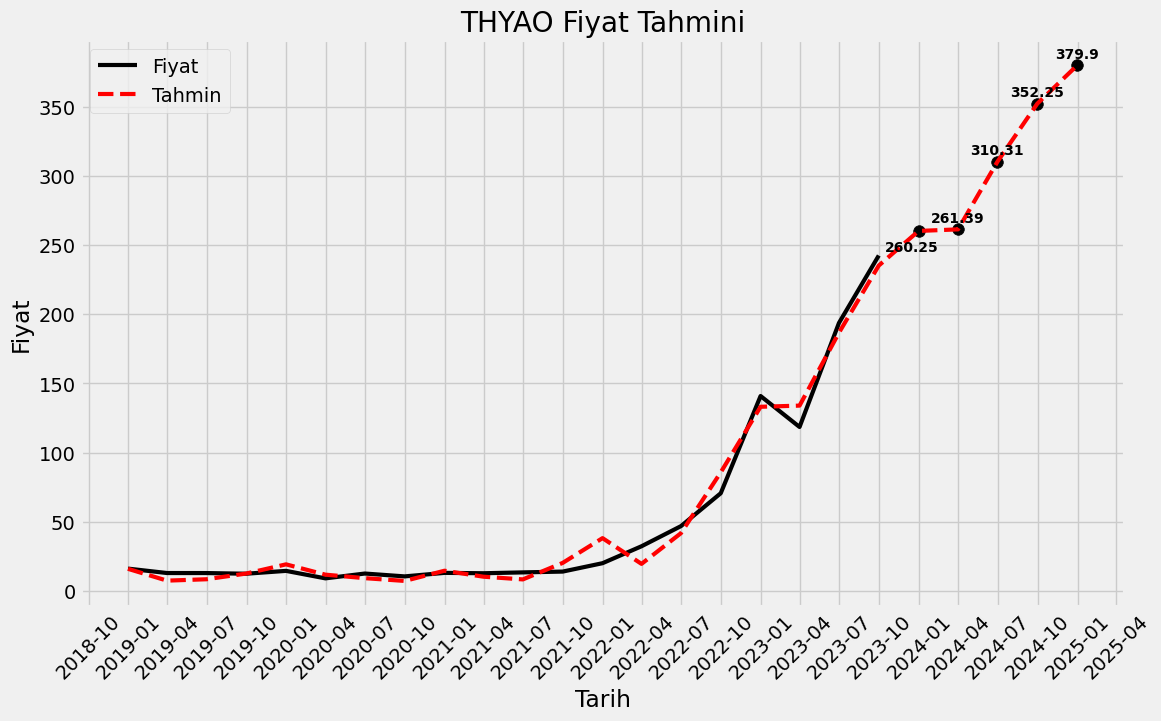

In [201]:
import matplotlib.dates as mdates
y.tail(20).plot(figsize=(12,7),label="Fiyat",color="black",linestyle="-",lw=3)
tahmin3["Tahmin"].tail(25).plot(label="Tahmin",color="red",linestyle="--",lw=3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))  # Çeyrekler için ay ayırıcıları
plt.xticks(rotation=45)
plt.scatter(tahmin3.index[-5::],tahmin3["Tahmin"][-5::],color="black",marker="o",s=70)
plt.title("THYAO Fiyat Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")

for i in range(-5,-4):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(-5,-15), ha='center',weight="bold",fontsize=10)
for i in range(-4,0):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10,weight="bold")


plt.legend()
plt.show()